# Game of Life

**A project by:**
- Bergamin Eleonora
- Boni Filippo
- Campagnola Stefano
- Santagata Luca

**Abstract:**
In this project we have implemented an interactive version of the “Game of Life”. 
First of all we have analysed  the behaviour of several  patterns, implementing  different types of graphs. 
Then we have computed a 3D version of the Game of Life, and visualized its behaviour. 
Finally we have introduced the Genetic Algorithms in order to explore new rules that characterize the evolution of patterns.

In order to run the code is necessary to install the net libraries:

In [ ]:
#!pip install pygame
#!pip install bar_chart_race

In [ ]:
import copy
import math
import pygame
import numpy as np
import itertools

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

from IPython.display import Video

from Game_of_Life_patterns import *

## Introduction to the code

Game of Life is a cellular automaton devised by the British mathematician John Conway in 1970. Once the initial conditions are set the evolution of the game is fully determined, meaning that the player does not need to intervene in the game.
The game consists in setting the initial conditions and observing how the pattern evolves.

**Game of Life: Universe and Rules**

The space where the Game of Life evolves is an infinite 2D grid of squares. Each cell of the grid is either alive or dead. The evolution of the pattern is based on the interaction of every cell with its neighbors, meaning the adjacent cells. Any cell can have from 0 to 8 living neighbors.
At each iteration, for each cell:
- if it is alive, it remains alive if it has between 2 and 3 alive neighbors.
- if it is dead, it becomes alive if it has between 3 and 3 alive neighbors.

In all other cases if the cell is alive it dies, and dead cells stay dead.

In the 3D game (see below) the rule is traditionally called 2333.

At each time step, these rules are applied to obtain the new generation in the game.

## Let's play

In [ ]:
class game_of_life():
     
    def init(self, b, h, max_epoch, pixel_size): 
        pygame.init()
        self.N = h 
        self.M = b 
        self.screen = pygame.display.set_mode((b*pixel_size, h*pixel_size)) 
        self.data = np.zeros((self.N,self.M)) 
        self.clock = pygame.time.Clock() 
        self.start = False 
        self.initial = True  
        self.epoch = 0 
        self.max_epoch = max_epoch
        self.pixel_size = pixel_size
          
     
    def game_rules(self,x,y): 
         
        mask_1 = np.logical_and(x == 1, y < 2) 
        mask_2 = np.logical_and(x == 1, np.logical_or( y == 2, y == 3)) 
        mask_3 = np.logical_and(x == 1, y > 3) 
        mask_4 = np.logical_and(x == 0, y == 3) 
 
        return mask_1,mask_2,mask_3,mask_4 
     
     
    def next_generation(self): 
         
         
        n_alive = np.zeros((self.N,self.M)) 
         
        grid_d_d = np.roll(np.roll(self.data, -1, axis=1), -1, axis=0) 
        grid_d_d[:,self.M-1] = 0 
        grid_d_d[self.N-1,:] = 0 
         
        grid_u_u = np.roll(np.roll(self.data, 1, axis=1), 1, axis=0) 
        grid_u_u[:,0] = 0  
        grid_u_u[0,:] = 0 
         
        grid_s_d = np.roll(self.data, -1, axis=1) 
        grid_s_d[:,self.M-1] = 0  
         
        grid_u_d = np.roll(np.roll(self.data, -1, axis=1), 1, axis=0) 
        grid_u_d[:,self.M-1] = 0 
        grid_u_d[0,:] = 0 
         
        grid_d_s = np.roll(self.data, -1, axis=0) 
        grid_d_s[self.N-1,:] = 0 
         
        grid_u_s = np.roll(self.data, 1, axis=0) 
        grid_u_s[0,:] = 0 
         
        grid_d_u = np.roll(np.roll(self.data, 1, axis=1), -1, axis=0) 
        grid_d_u[:,0] = 0 
        grid_d_u[self.N-1,:] = 0 
         
        grid_s_u = np.roll(self.data, 1, axis=1) 
        grid_s_u[:,0] = 0 
         
         
        n_alive = grid_d_d + grid_u_u + grid_s_d + grid_u_d + grid_d_s + grid_u_s + grid_d_u + grid_s_u 
         
        m_1,m_2,m_3,m_4 = self.game_rules(self.data , n_alive) 
         
        self.data[m_1] = 0 
        self.data[m_2] = 1 
        self.data[m_3] = 0 
        self.data[m_4] = 1 
         
        return self.data 
         
    
    def update(self): 
        
        self.screen.fill((0,0,0)) 
         
        ind = np.where(self.data==1) 
        for i,j in zip(ind[0],ind[1]): 
            pygame.draw.rect(self.screen, (255, 255, 255), (j*self.pixel_size, i*self.pixel_size, self.pixel_size, self.pixel_size)) 
    
        font = pygame.font.SysFont('cambria.ttf', int(0.05*self.M*self.pixel_size), bold=True)     
        punti_render = font.render(str("Epoch: ") + str(self.epoch), 1, (255, 140, 105)) 
        self.screen.blit(punti_render, (0.7*self.pixel_size*self.M, 0.9*self.pixel_size*self.N))
        
        
     
    def user_initial(self): 
        if self.initial:
            if pygame.mouse.get_pressed()[0]: #press the left button to add living cells
                x,y = pygame.mouse.get_pos()
                self.data[math.floor((y)/self.pixel_size)][math.floor((x)/self.pixel_size)] = 1
            if pygame.mouse.get_pressed()[1]:  #press the mouse wheel to delete cells
                x, y = pygame.mouse.get_pos()
                self.data[math.floor(y/self.pixel_size)][math.floor(x/self.pixel_size)] = 0
            if pygame.mouse.get_pressed()[2]: #press the right button to start the simulation
                self.initial = False
                self.start = True
            
     
    def start_game(self): 
        self.epoch = 0 
        self.run = True 
        while self.run == True: 
            for event in pygame.event.get(): 
                if event.type == pygame.QUIT: 
                    self.run = False 
            self.update()    
            if self.start: 
                self.next_generation() 
                self.clock.tick(10) 
                self.epoch += 1 
            self.user_initial() 
            pygame.display.update() 
          
             
             
b = 80
h = 50

pygame.init() 
pygame.display.set_caption("Game of Life") 
pygame.font.init() 
font = pygame.font.SysFont('cambria.ttf', int(0.5*b), bold=True) 
font_small = pygame.font.SysFont('cambria.ttf', 30, bold=True)


game = game_of_life()

game.init(int(b), int(h), 100, 15)
game.start_game()
pygame.display.quit()
pygame.quit()


## The code of  the game

**Calculation of the new generation**

The evolution of the game (so the definition of a new generation) is based on two matrixes defined through numpy: data and n_alive. The first one represents the grid of the game at a given generation. The second one contains the number of living neighbors around a given cell: the element (i,j) of the n_alive matrix is the number of living neighbors around the element (i,j) of the grid.

The game rules are applied through some masks, bidimensional matrixes which are calculated using the data and n_alive matrixes. There is a mask for each rule, and each mask is applied to the data matrix. If the data matrix elements satisfy the mask condition, a new value is associated to them. In this way, we obtain the new generation.

The n_alive matrix is calculated using a numpy function called numpy.roll. This function allows to roll a given matrix along one(or more) of its axis with a given step. The idea is to shift the data matrix in all 8 possible directions (up, down, left, right, up-left, up-right, down-left, down-right) creating 8 different matrixes. For each of these matrixes, each element (i,j) is different from the original one. For example in the matrix obtained by rolling the matrix on the right, the new element (i,j) was the element(i-1,j) in the original matrix. The sum of these 8 matrixes gives the matrix n_alive, since each element of them can be 1 or 0. Using this function, in any direction, elements that roll beyond the last position are re-introduced at the first at the opposite side. In this way, what we obtain is a game with periodic boundary conditions. In order to avoid the periodic conditions we set the "re-introduced" elements equal to zero; thus, they do not give any contribution to the sum of the matrixes.
(For technical details about numpy.roll() in the next link the official documentation is presented: https://numpy.org/doc/stable/reference/generated/numpy.roll.html)

The process just explained is schematically shown in the next image.

**Pygame**

Pygame is a Python language module dedicated to graphics. The library contains several graphic functions, useful for creating games and animations.

The Pygame package contains several methods and functions dedicated to specific aspects.

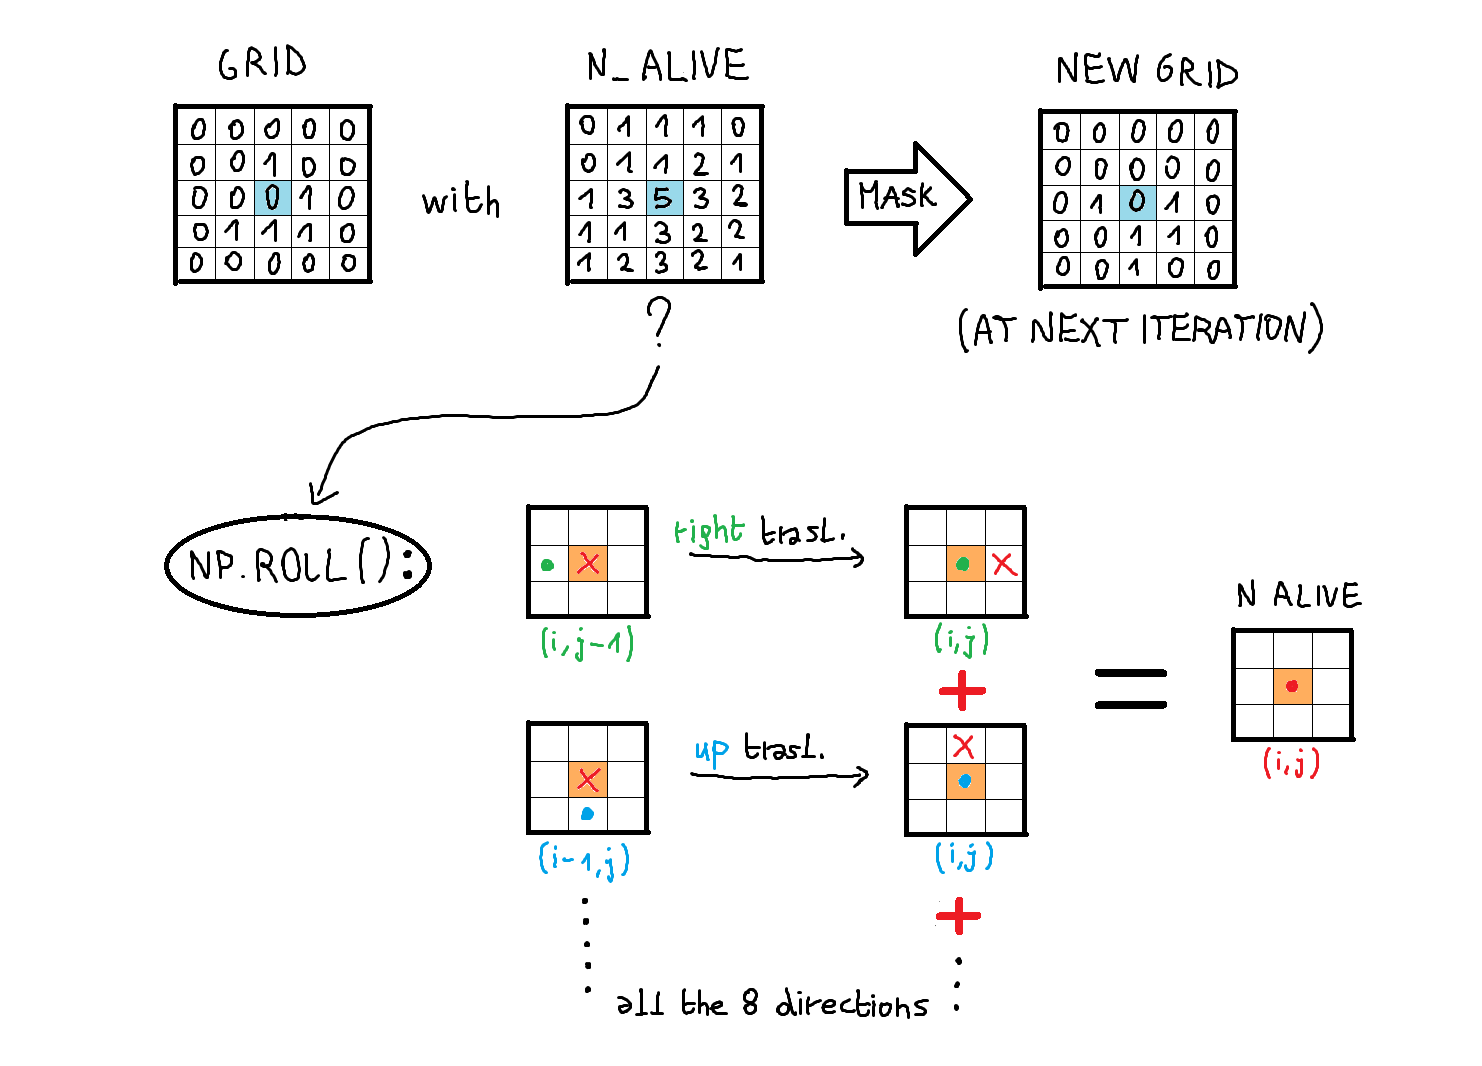

In [ ]:
class game_of_life_np():
     
    def init(self, b, h, still_lifes, max_epoch, pixel_size): 
        pygame.init() #Initializes the pygame library.
        self.N = h #setting the dimensions of the game
        self.M = b 
        self.screen = pygame.display.set_mode((b*pixel_size, h*pixel_size)) #Initialize a window or screen for display
        self.data = np.zeros((self.N,self.M))  #initialize the grid of the game
        self.clock = pygame.time.Clock() #create an object to help track time
        self.start = False #intialize useful viariables
        self.initial = True 
        self.count_alive = [] 
        self.epoch = 0 
        self.last_generation = np.zeros((self.N,self.M))
        self.presentation = still_lifes
        self.max_epoch = max_epoch
        self.pixel_size = pixel_size
 
        self.period = 0 
        self.pattern_name = 'Not computed' 
        self.speed = 0 
        self.dir = 'None' 
        self.heat = 0 
 
     
    def initial_condition(self, pattern, x_pos, y_pos):  #function that paste the choosen pattern to the initialized grid
            self.x_pos = x_pos #setting pattern position
            self.y_pos = y_pos 
            self.pattern = pattern 
            self.data[self.y_pos:self.y_pos+pattern.shape[0], self.x_pos:self.x_pos+pattern.shape[1]] += pattern 
            self.born = self.data.copy() 
          
          
     
    def game_rules(self,x,y):  #function that sets the rules throught the masks
         
        mask_1 = np.logical_and(x == 1, y < 2) 
        mask_2 = np.logical_and(x == 1, np.logical_or( y == 2, y == 3)) 
        mask_3 = np.logical_and(x == 1, y > 3) 
        mask_4 = np.logical_and(x == 0, y == 3) 
 
        return mask_1,mask_2,mask_3,mask_4 
     
     
    def next_generation(self): #function that calculates the new generation 
         
        self.count_alive.append(self.data.sum()) #storing the number of alive cells
        self.last_generation = self.data.copy()  #storing the ccurrent generation
         
        n_alive = np.zeros((self.N,self.M)) #initialize the n_alive matrix
         
        grid_d_d = np.roll(np.roll(self.data, -1, axis=1), -1, axis=0) #calculate the shifted matrix with np.roll
        grid_d_d[:,self.M-1] = 0 # setting to zero the needed column and row of the shifted matrix 
        grid_d_d[self.N-1,:] = 0 
         
        grid_u_u = np.roll(np.roll(self.data, 1, axis=1), 1, axis=0) 
        grid_u_u[:,0] = 0  
        grid_u_u[0,:] = 0 
         
        grid_s_d = np.roll(self.data, -1, axis=1) 
        grid_s_d[:,self.M-1] = 0  
         
        grid_u_d = np.roll(np.roll(self.data, -1, axis=1), 1, axis=0) 
        grid_u_d[:,self.M-1] = 0 
        grid_u_d[0,:] = 0 
         
        grid_d_s = np.roll(self.data, -1, axis=0) 
        grid_d_s[self.N-1,:] = 0 
         
        grid_u_s = np.roll(self.data, 1, axis=0) 
        grid_u_s[0,:] = 0 
         
        grid_d_u = np.roll(np.roll(self.data, 1, axis=1), -1, axis=0) 
        grid_d_u[:,0] = 0 
        grid_d_u[self.N-1,:] = 0 
         
        grid_s_u = np.roll(self.data, 1, axis=1) 
        grid_s_u[:,0] = 0 
         
         
        n_alive = grid_d_d + grid_u_u + grid_s_d + grid_u_d + grid_d_s + grid_u_s + grid_d_u + grid_s_u 
         
        m_1,m_2,m_3,m_4 = self.game_rules(self.data , n_alive) #calculate the masks
         
        self.data[m_1] = 0 #apply the masks to calculate the new generation
        self.data[m_2] = 1 
        self.data[m_3] = 0 
        self.data[m_4] = 1 
         
        return self.data 
         
    
    def update(self): 
        self.screen.fill((0,0,0)) #Fill the surface with a color given in a RGB format
        
        ind = np.where(self.data==1) 
        for i,j in zip(ind[0],ind[1]): 
            pygame.draw.rect(self.screen, (255, 255, 255), (j*self.pixel_size, i*self.pixel_size, self.pixel_size, self.pixel_size)) 
    
        font = pygame.font.SysFont('cambria.ttf', int(0.05*self.M*self.pixel_size), bold=True)  #create a Font object from the system fonts  
        punti_render = font.render(str("Epoch: ") + str(self.epoch), 1, (255, 140, 105)) # draw text
        self.screen.blit(punti_render, (0.7*self.pixel_size*self.M, 0.9*self.pixel_size*self.N)) #draw the "text image" onto the screen dispaly
        
        
        if self.presentation == True:
            
            title_block = font_small.render(str("Block"), 1, (255,0,0))                                                #**** 
            self.screen.blit(title_block, (106,180)) 
         
            title_tube = font_small.render(str("Tube"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_tube, (280,180)) 
         
         
            title_boat = font_small.render(str("Boat"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_boat, (440,180)) 
         
         
            title_ship = font_small.render(str("Ship"), 1, (255,0,0))                                                   #****
            self.screen.blit(title_ship, (600,180)) 
        
            title_bee_hive = font_small.render(str("Bee hive"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_bee_hive, (106,380)) 
         
         
            title_loaf = font_small.render(str("Loaf"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_loaf, (285,380)) 
         
         
            title_pond = font_small.render(str("Pond"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_pond, (440,380)) 
         
         
            title_snake= font_small.render(str("Snake"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_snake, (600,380)) 
         
         
            title_eater1= font_small.render(str("Eater1"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_eater1, (280,580)) 
         
         
            title_eater2= font_small.render(str("Eater2"), 1, (255,0,0))                                                   #**** 
            self.screen.blit(title_eater2, (455,620)) 
         
        ind = np.where(self.data==1) 
        for i,j in zip(ind[0],ind[1]): #drawing the living cell
            pygame.draw.rect(self.screen, (255, 255, 255), (j*self.pixel_size, i*self.pixel_size, self.pixel_size, self.pixel_size)) 
     
    def user_initial(self): 
            if pygame.mouse.get_pressed()[0]: #get the state of the mouse left button in order to start the game
                self.initial = False 
                self.start = True 
            
     
    def start_game(self): 
        self.epoch = 0 
        self.run = True 
        while self.run == True: #updating the game 
            for event in pygame.event.get(): #we fetch all the events that pygame has detected
                if event.type == pygame.QUIT:  #if an event is "closing of the window" we deinit the pygame library
                    self.run = False 
            self.update()    
            if self.start: 
                self.next_generation() 
                self.clock.tick(10) #set update frequency (frame per second)
                self.epoch += 1 
                if self.pattern_name == 'Not computed': 
                    self.period_calc() 
            self.user_initial() 
            pygame.display.update() #the display is updated 
            if self.epoch >= self.max_epoch: #ending the game till a certain number of generations is reached
                break 
             
             
 
 
    def period_calc(self):

        a = range(self.N)
        b = range(self.M)
        self.heat += np.sum(np.abs(self.last_generation - self.data))

        if self.epoch == 1:
            if np.array_equal(self.born,
                              self.data):  # still lifes are constat patterns, so at the first iteration they remain the same. The number of cells changing is 0
                self.pattern_name = 'Still Life'
                self.period = self.epoch
                self.heat = 0

        else:
            if np.array_equal(self.born,
                              self.data):  # if the grid returns to its initial condition this means the pattern did not move and it is an oscillator
                self.pattern_name = 'Oscillator'
                self.period = self.epoch
                self.heat = self.heat / self.period

            else:

                for i, j in itertools.product(a, b):  # we consider all points in the grid

                    if np.array_equal(self.data[i: i + self.pattern.shape[0], j: j + self.pattern.shape[1]],
                                      self.pattern):
                        coord = np.array([np.abs(self.x_pos - j), np.abs(self.y_pos - i)])
                        self.period = self.epoch
                        self.speed = np.max(coord) / self.period

                        if self.speed != 0:
                            if coord[0] == 0 or coord[1] == 0:  # the pattern moves only in one direction
                                self.dir = 'Orthogonal'
                            else:
                                if coord[0] == coord[1]:
                                    self.dir = 'Diagonal'
                                else:
                                    self.dir = 'Oblique'  # the direction is not orthogonal nor diagonal

                        if self.born.sum() == self.data.sum():  # if the pattern is the same but shifted it is a spaceship
                            self.pattern_name = 'Spaceship'
                            self.heat = self.heat / self.period

                        else:
                            self.pattern_name = 'Gun or puffer'
                            self.heat = 0

In [ ]:
b = 80
h = 50

pygame.init() 
pygame.display.set_caption("Game of Life") 
pygame.font.init() 
font = pygame.font.SysFont('cambria.ttf', int(0.5*b), bold=True) 
font_small = pygame.font.SysFont('cambria.ttf', 30, bold=True)
 
game = game_of_life_np()

### Animation Function

In [ ]:
from IPython.display import HTML
from matplotlib import animation

def plot_animate(ptrname, g):
    fig, ax = plt.subplots(figsize=(8,6)) 
 
 
    number_of_frames = g.epoch # x values in the plot
    data = np.array(game.count_alive) # y values in the plot
 
 
    def animate(num, data): 
        plt.cla() #clears the current axis
        ax.plot(range(num), data[:num], color = 'orange', linewidth = 2)
        ax.set_title(ptrname, fontweight = 'bold')
        ax.set_xlabel('Iteration Number', fontweight = 'bold')
        ax.set_ylabel('Alive Cells', fontweight = 'bold')
        
 
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=number_of_frames, fargs=(data,)) #creating animation, needs number of frames corresponding to the umber of iterations, and values to plot 
    
    return ani

"""
if we want to save the video:

writervideo = matplotlib.animation.PillowWriter(fps = 10)

and then:

a = plot_animate('title', game)

f = 'title.gif'
a.save(f, writer = writervideo)

html = HTML(a.to_jshtml())
display(html)

"""

### Bar Chart Race function

In [ ]:
import bar_chart_race as bcr 
 
def bar_chart_race(name, initial_configuration, gof):  
    grid_pixels = (gof.M *gof.N) 
    height_figure = initial_configuration.shape[0] 
    lenght_figure = initial_configuration.shape[1] 
    figure_surface = height_figure*lenght_figure   #The oscilllators stay confined only in a part of the grid.  
                                                   #In order to avoid the plot of the cells that never evolve,  
                                                   #we take into consideration only the cells that evolve. 
     
    count_dead = np.array(gof.count_dead) - (grid_pixels-figure_surface)  
    count_dead = list(count_dead)  
    df = pd.DataFrame(zip(gof.count_alive,count_dead), columns = ['live cells',"dead cells"]) #create a dictionary with the number of alive  
                                                                                              #and dead cells for each epoch 
 
    def summary(values, ranks): 
        s = "Number of iterations" 
        return {'x': .99, 'y': .05, 's': s, 'ha': 'right', 'size': 8, "fontweight":"bold"}  
 
    BCR = bcr.bar_chart_race(df=df, fixed_max=True,  
                   fixed_order=True, # keep the order of the columns in the dataframe 
                   title= name, 
                   orientation='h', 
                   figsize=(5, 3), 
                   shared_fontdict={'family': 'Helvetica', 
                                    'color': 'black'}, 
                   period_summary_func =summary, #counts the iteration number 
                   steps_per_period=1, #frammerate 
                   cmap = "t10", #colormap for the columns 
                   n_bars = 2, 
                   bar_kwargs={'alpha': 0.6, 'ec': 'black', 'lw': 0.8}  #sharpness and contour of the columns 
                      ) 
    return BCR

### Fourier Transform Function

In [ ]:
import scipy
from scipy.fftpack import fft, fftfreq
import operator

def Fourier(titolo, game):
    
    fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
    ax1.plot(game.count_alive,linewidth=3.0, color = "orange")
    ax1.set_title(titolo,fontweight="bold",fontsize=20)
    ax1.set_xlabel("Iteration Number",fontweight="bold",fontsize=20)
    ax1.set_ylabel("Alive Cells",fontweight="bold",fontsize=20)
        
    
    n = len(game.count_alive)
    dt = 1
    fhat = np.fft.fft(game.count_alive,n) ## Compute the FFT 
    PSD = fhat * np.conj(fhat) / n #Power spectrum  density (power per freq) magnitude of each fourier coefficient (how much power is in each of this frequencies in the red data)
    PSD = np.real(PSD)
    PSD = PSD[1:]
    freq = (1/(dt*n)) * np.arange(n) #Create x-axis of frequencies in Hz
    freq = freq[1:]
    ax2.plot(freq, PSD,linewidth=3.0, color="black")
    ax2.set_xlabel("Frequencies (Hz)",fontweight="bold",fontsize=20)
    ax2.set_ylabel("Amplitudes",fontweight="bold",fontsize=20)
    ax2.set_title("Fourier Transform of occupancy plot",fontweight="bold",fontsize=20)
    
    plt.show()
        

## Patterns and their characteristics

**Pattern Categories**

Analyzing their behavior, the patterns can be subdivided in three main categories: still lifes, oscillators, and spaceships.

**Still lifes** are patterns that are constant in time, and are the same in different generations. This means their period (number of generations after the pattern repeats itself) is 1. Constellations can also be implemented: those are still lifes made of many non-interacting objects.

**Oscillators** are patterns that after a certain number of iterations evolve into its original state without shifting.

**Spaceships** in contrast return to their initial state with the same orientation but in a different position.

There are then **guns** and **puffers**, that are patterns which create spaceships or leave “debris” behind. <br> <br>


**Pattern properties**

A property of every pattern which is actually an initial condition and does not need to be computed is the **bounding box**, meaning the smallest grid of squares containing the pattern.

The general features of the patterns that we considered are:

- **occupancy**: number of living cells at each time step. For still lifes the occupancy is always the same since the pattern does not change. There are patterns such as guns and puffers that increase their dimension at every time step.

- **period**: number of generations needed so that the pattern returns to its initial configuration (even if in a different position). When computing the period, we confront the initial pattern with its bounding box with the evolution.

  For objects that create spaceships, i. e. guns, **true-period**, and **pseudo-period** are defined. A gun has a pseudo-period when the mechanism has a certain period but the spaceship has another period. If both the spaceship and the mechanism have the same period then the gun has a true-period.

- **heat** (only for oscillators and spaceships): average number of cells changing at each generation in a period.

- **speed** and its **direction** (only for spaceships): number of generations needed to travel some given distance. It is usually measured in terms of fractions of the speed of light c, and calling x and y the displacement along the axes it is measured as:

$$ \begin{aligned} v = \frac{max (|x|, |y|)} {n}  \end{aligned} $$ 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;where n is the period.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The direction can be orthogonal (if the displacement is 0 along one of the axes), diagonal (if we have the same displacement along the two axes),
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;oblique (if the displacement values along the axes are different).

## Still Lifes

In [ ]:
b = 80
h = 80

game.init(int(b), int(h), True, 100, 10)
game.initial_condition(block(), int(0.15*b), int(0.15*h)) #initializing the grid with the needed patterns 
game.initial_condition(tube(), int(0.35*b), int(0.15*h)) 
game.initial_condition(boat(), int(0.55*b), int(0.15*h)) 
game.initial_condition(ship(), int(0.75*b), int(0.15*h)) 
game.initial_condition(bee_hive(), int(0.15*b), int(0.4*h)) 
game.initial_condition(loaf(), int(0.35*b), int(0.4*h)) 
game.initial_condition(pond(), int(0.55*b), int(0.4*h)) 
game.initial_condition(snake(), int(0.75*b), int(0.4*h)) 
game.initial_condition(eater1(), int(0.35*b), int(0.65*h)) 
game.initial_condition(eater2(), int(0.55*b), int(0.65*h)) 
game.start_game() 
pygame.display.quit() #quitting the display 
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format(round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", game.heat)

## Oscillators

### Blinker

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15) #initializing the game
ptrn = blinker() #setting the pattern
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2)) #initializing the grid with the pattern
game.start_game() #starting the game
pygame.display.quit() #quitting the game display
print("Period: {}".format(game.period)) #printing the interesting quantities
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Blinker', game) #printing the plot of the alive cells in time

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Blinker.mp4")  #printing the bar chart race of the alive cells

### Toad

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = toad()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Toad', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Toad.mp4")

### Pulsar

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = pulsar()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Pulsar', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Pulsar.mp4")

In [ ]:
Fourier("Pulsar",game)

### Pentadecathlon

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = penta_decathlon()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format(game.speed))
print("Direction: {} ".format( round(game.speed, 3)))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Pentadecathlon', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Penta_decathlon.mp4")

In [ ]:
Fourier("Pentadecathlon",game)

### Bi-pentadecathlon

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = bi_penta_decathlon()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Bi-pentadecathlon', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Bi_penta_decathlon.mp4")

In [ ]:
Fourier("Bi-pentadecathlon", game)

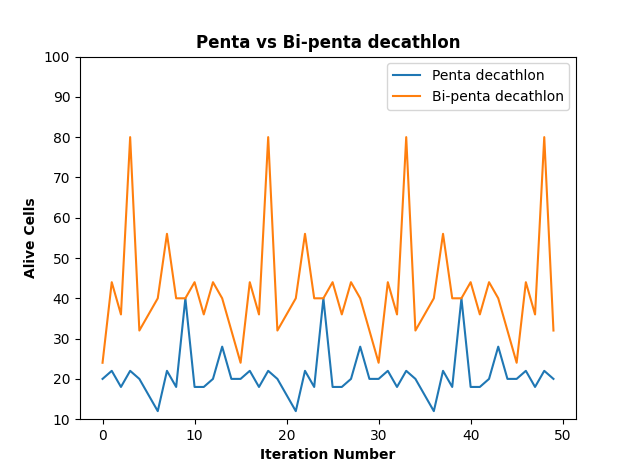

### Octagon 2

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = octagon()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Octagon 2', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Octagon.mp4")

In [ ]:
Fourier("Octagon 2",game)

### Queen bee shuttle

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = queen_bee_shuttle()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Queen bee shuttle', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Queen bee shuttle.mp4")

In [ ]:
Fourier("Queen bee shuttle",game)

## Spaceships, guns and puffers

### Glider

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = glider()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Glider', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Glider.mp4")

### Lightweight spaceship

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = lw_spaceship()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Lightweight spaceship', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Lightweight spaceship.mp4")

### Weekender

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = weekender()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Weekender', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Weekender.mp4")

### Spider

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = spider()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Spider', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Spider.mp4")

### Glider Gun

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 150, 15)
ptrn = glider_gun()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Glider gun', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Glider gun.mp4")

### Blinker Puffer 1

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = blinker_puffer1()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Blinker Puffer 1', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Blinker puffer 1.mp4")

### Pufferfish

In [ ]:
b = 80
h = 50

game.init(int(b), int(h), False, 50, 15)
ptrn = pufferfish()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2 + 10))
game.start_game()
pygame.display.quit()
print("Period: {}".format(game.period))
print("Pattern: {}".format(game.pattern_name))
print("Speed: {}c".format( round(game.speed, 3)))
print("Direction: {} ".format(game.dir))
print("Heat (only for oscillators and spaceships): ", round(game.heat,3))

In [ ]:
a = plot_animate('Pufferfish', game)

html = HTML(a.to_jshtml())
display(html)
plt.close()

In [ ]:
Video("bar_chart/Pufferfish.mp4")

## Methusaleah

In [ ]:
b = 160
h = 160

game.init(int(b), int(h), False, 200, 5)
ptrn = Pi_heptomino()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()

In [ ]:
x = np.arange(0,game.epoch,1)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, game.count_alive, color = "orange", linewidth=2)
ax.set_xlabel("Iteration Number",fontweight="bold",fontsize=15)
ax.set_ylabel("Cells Alive",fontweight="bold",fontsize=15)
ax.set_title("Pi heptomino",fontweight="bold",fontsize=15)

In [ ]:
b = 160
h = 160

game.init(int(b), int(h), False, 180, 5)
ptrn = B_heptomino()
game.initial_condition(ptrn, int(b/2- ptrn.shape[1]/2), int(h/2 - ptrn.shape[0]/2))
game.start_game()
pygame.display.quit()

In [ ]:
x = np.arange(0,game.epoch,1)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, game.count_alive, color = "orange", linewidth=2)
ax.set_xlabel("Iteration Number",fontweight="bold",fontsize=15)
ax.set_ylabel("Cells Alive",fontweight="bold",fontsize=15)
ax.set_title("B heptomino",fontweight="bold",fontsize=15)

# Game of Life 3D

In the 80s the scientist Carter Bays published a paper in which different types of 3D Game of Life were studied and analyzed. The idea is to consider a third spatial axis in order to get a space where the Game evolves that is a series of parallel 2D grids. This set of grids gives depth to the problem. In this way, the number of neighbors for each cell is 26 and its evolution depends on how many of them are alive such as the simple 2D Game of Life.


Carter Bays found that a good set of evolving rules is the following:
- a living cell remains alive if it has between 5 and 7 alive neighbors
- a dead cell becomes alive if it has between 6 and 6 alive neighbors

In all other cases if the cell is alive it dies, and dead cells stay dead.

The rule is usually called (5766).

With this project, we wanted to apply these rules to a three-dimensional glider. Its initial setting consists of two bidimensional equal gliders that are placed parallelly next to each other. Here we present an image of the 3D glider shown in the Bays' paper:

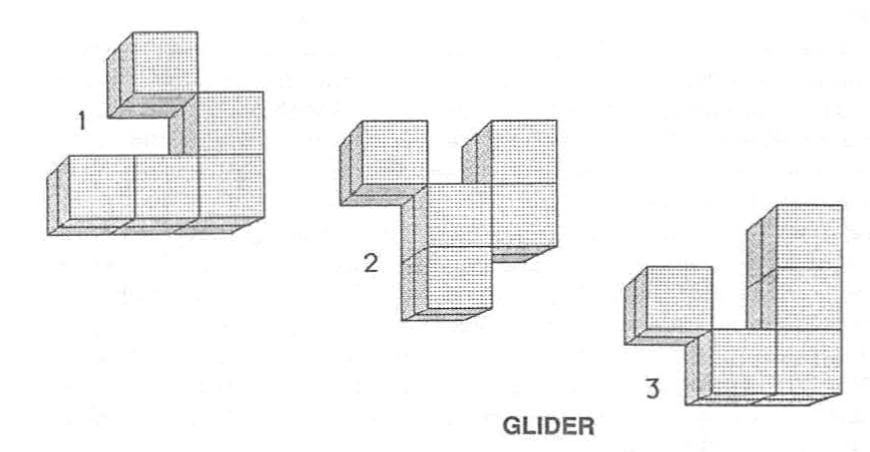

The method applied to calculate the 3D Game of Life evolution is the same applied in the bidimensional case, so we applied the np.roll method, considering all the possible 26 movements, to calculate the n_alive matrix in a given generation and we used masks to determine the evolution.

In [ ]:
import pandas as pd
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D #permits to use projection '3d'

### The new algorithm

In [ ]:
def glider3d(): #definition of the 3D glider
    glider = [[[0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 0, 0, 0, 0]],
              [[0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 0, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 0, 0, 0, 0]]]
    

    return np.array(glider)



class game_of_life_np_3d():

    def init(self, b, h, z):
        self.N = h
        self.M = b
        self.Z = z
        self.data = np.zeros((self.Z, self.N, self.M))

    def initial_condition(self, pattern, x_pos, y_pos, z_pos):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.z_pos = z_pos
        self.pattern = pattern
        self.data[self.y_pos:self.y_pos+pattern.shape[0], self.x_pos:self.x_pos+pattern.shape[1], self.z_pos:self.z_pos+pattern.shape[2]] += pattern
        self.born = self.data.copy()
   

    def game_rules(self, x, y): #setting the new rules through masks 

        mask_1 = np.logical_and(x == 1, y < 5)
        mask_2 = np.logical_and(x == 1, np.logical_or(y == 5, y == 6, y == 7))
        mask_3 = np.logical_and(x == 1, y > 7)
        mask_4 = np.logical_and(x == 0, y == 6)

        return mask_1, mask_2, mask_3, mask_4

    def next_generation(self):

        n_alive = np.zeros((self.Z, self.N, self.M))

        x = [-1, 0, 1] #possible size of a step

        for el in itertools.product(x, repeat=3): # itertools.producct calculates all the possible permutations of the steps sizes
                                                  # a given conbination of [-1, 0, 1] represent a movement along each axis

            if np.any(el): n_alive += np.roll(self.data, el, axis = (0, 1, 2))  #summing al the possible np.roll configurations that has at least a movement along an axis different from zero
   

        m_1, m_2, m_3, m_4 = self.game_rules(self.data, n_alive)
        


        self.data[m_1] = 0
        self.data[m_2] = 1
        self.data[m_3] = 0
        self.data[m_4] = 1

        return self.data

    def index_1(self,data): #function that finds the coordinates of the cells different from zero in a given generation
        indx = np.where(data==1) 

        return indx

    def start_game(self):
        
        data_orig = self.born #saving the first generation
        ind = self.index_1(data_orig) # finding coordinates of the living cells
        ind = np.asarray(ind) #turning it to a numpy array 
        
        t = np.array([np.ones(len(ind[1,:]))*0]).flatten() 
        df_tot = pd.DataFrame({"time": t ,"x" : ind[2,:], "y" : ind[1,:], "z" : ind[0,:]}) #generating a dataframe where each row represents a living cell 
                                                                                           # a living cell in this datframe is defined by its generation(t) and its spatial coordinates
            
        df_tot_2 = pd.DataFrame({"time": t ,"x" : ind[0,:], "y" : ind[1,:], "z" : ind[2,:]})
        
        for i in range(1,11): # repeating the process for 10 generations
            data = self.next_generation()
            ind = self.index_1(data)
            ind = np.asarray(ind)
            
            t = np.array([np.ones(len(ind[1,:]))*i]).flatten()
            df = pd.DataFrame({"time": t ,"x" : ind[2,:], "y" : ind[1,:], "z" : ind[0,:]})
            df_2 = pd.DataFrame({"time": t ,"x" : ind[0,:], "y" : ind[1,:], "z" : ind[2,:]})
            
            df_tot = pd.concat([df_tot,df], ignore_index=True) #concatenating the new generation dataframe to the previous ones
            df_tot_2 = pd.concat([df_tot_2,df_2], ignore_index=True)
            

        return df_tot,df_tot_2  # the result is a dataframe containing all the coordinates of the living cells at each generation

b = 8
h = 8
z = 8



game_3 = game_of_life_np_3d()

game_3.init(int(b), int(h), int(z))
game_3.initial_condition(glider3d(), int(0.0), int(0.0), int(0.0))
df,df_2 = game_3.start_game()



### Visualisation of the results

In [ ]:
df = df

def update_graph(num): #defininig the updating function
    data=df[df['time']==num] #choosing data of a given generation
    graph.set_data (data.x, data.y) #setting the x and y coordinates of data of a frame
    graph.set_3d_properties(data.z) #setting z coordinate of data of a frame
    title.set_text('3D Test, time={}'.format(num)) #setting the title
     
    return title, graph, 


fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection='3d') #defininig a 3D plot 
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="s", markersize=10, color='w', markeredgecolor='black') #plotting the points in a 3D space

ax.set_xlim3d([-20, 20]) #setting axes limits and labels
ax.set_xlabel('X')
ax.set_xticklabels([])

ax.set_ylim3d([-20,20])
ax.set_ylabel('Y')
ax.set_yticklabels([])

ax.set_zlim3d([-8,8])
ax.set_zlabel('Z')
ax.set_zticklabels([])

ax.view_init(70, 0) #setting viewing angle

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 10, 
                               interval=500, blit=True)

html = HTML(ani.to_jshtml())
display(html)
plt.close()

In [ ]:
df = df_2

def update_graph(num): #defininig the updating function
    data=df[df['time']==num] #choosing data of a given generation
    graph.set_data (data.x, data.y) #setting the x and y coordinates of data of a frame
    graph.set_3d_properties(data.z) #setting z coordinate of data of a frame
    title.set_text('3D Test, time={}'.format(num)) #setting the title
     
    return title, graph, 


fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection='3d') #defininig a 3D plot 
title = ax.set_title('3D Test')

data=df[df['time']==0]
graph, = ax.plot(data.x, data.y, data.z, linestyle="", marker="s", markersize=10, color='w', markeredgecolor='black') #plotting the points in a 3D space

ax.set_xlim3d([-30, 30]) #setting axes limits and labels
ax.set_xlabel('X')
ax.set_xticklabels([])

ax.set_ylim3d([-20,20])
ax.set_ylabel('Y')
ax.set_yticklabels([])

ax.set_zlim3d([-20,20])
ax.set_zlabel('Z')
ax.set_zticklabels([])

ax.view_init(10, 20) #setting viewing angle

ani = matplotlib.animation.FuncAnimation(fig, update_graph, 10, 
                               interval=500, blit=True)

html = HTML(ani.to_jshtml())
display(html)
plt.close()

# Genetic Algorithm and the GoF

## Game(s) of Life:  a step forward

The typical Game of Life we introduced has some specific rules that characterize the evolution of patterns. For each cell, given its own state (alive or dead) and the number of alive nears neighbors, these rules are applied in order to generate the next iteration grid.

What happens if one decides to use another set of laws, in order to play another type of game?

First of all, rules characterizing the dynamic can be generalized to a new mathematical framework, as we can see in the next image.

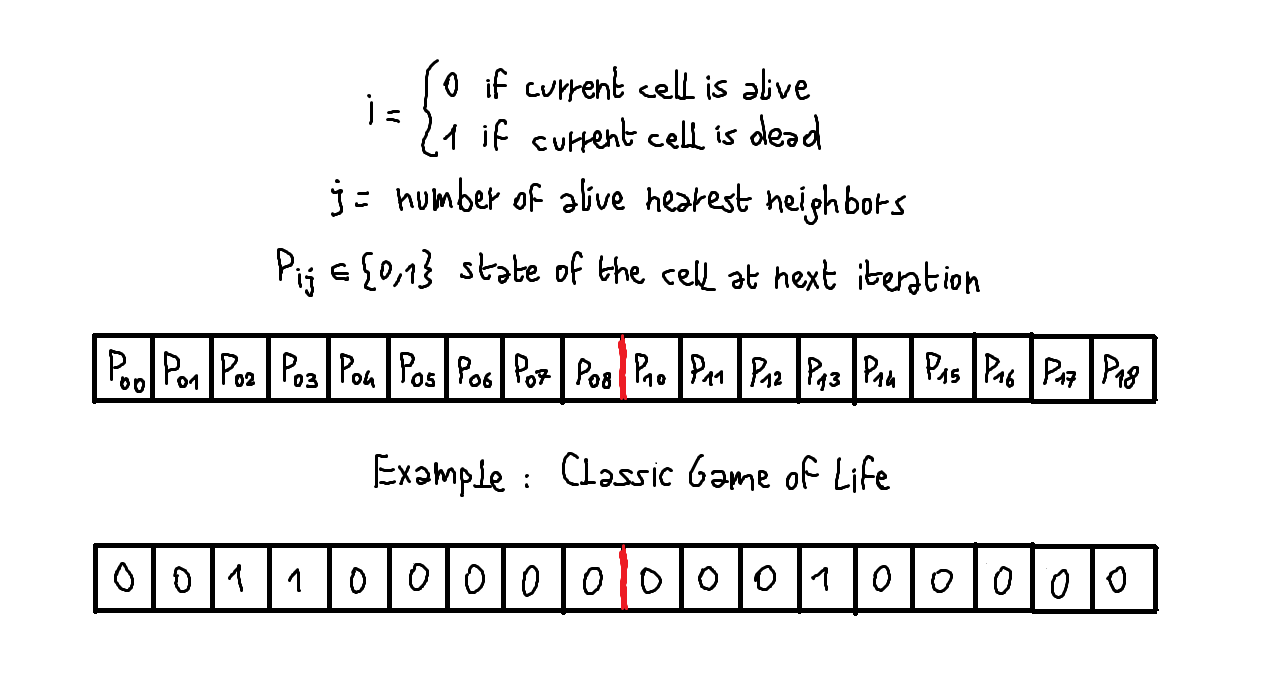

Every possible combination of cell state $i$ and alive neighbors $j$ should have its specific evolution called $P_{ij}$. This sort of matrix can be linearized in an 18 components vector. All the information on a generic "Game of Life" dynamic is so enclosed inside this vector of length 18 and made of 0 and 1.

This concept of multiple "Game(s) of Life" can be explored in many different ways. We can ask ourselves, for example, if there exists a better game with respect to the others on accomplishing a specific task. In our case, we decided to reach the following goal: __build an algorithm that, given__:
*  __an initial grid__
*  __a final grid__
*  $\delta$ __iteration between the two grids__

__finds the best game which, starting on the initial grid and evolving for $\delta$ times, recovers completely the final grid__.

One solution for this task could be found on running each of the $2^{18}$ possible games from the start to the end and taking the best among them. Another road, that allows us to deal with a smaller set of games, leads to the use of Genetic Algorithms.

## Some theory about Genetic Algorithms

Genetic algorithms are a family of search algorithms inspired by the principles of evolution
in nature. 

By imitating the process of natural selection and reproduction, genetic algorithms
can produce high-quality solutions for various problems involving search, optimization,
and learning.


At the same time, their analogy to natural evolution allows genetic
algorithms to overcome some of the hurdles that are encountered by traditional search and
optimization algorithms, especially for problems with a large number of parameters and
complex mathematical representations.

Genetic algorithms maintain a population of candidate solutions, called **individuals**, for that given problem.


These candidate solutions are iteratively evaluated and used to create a new generation of
solutions. Those who are better at solving this problem have a greater chance of being
selected and passing their qualities to the next generation of candidate solutions. 


This way,
as generations go by, candidate solutions get better at solving the problem at hand.

### Genotype

In nature, breeding, reproduction, and mutation are facilitated via the **genotype** – a
collection of genes that are grouped into chromosomes. If two specimens breed to create
offspring, each chromosome of the offspring will carry a mix of genes from both parents.


Mimicking this concept, in the case of genetic algorithms, each individual is represented by
a chromosome representing a collection of genes. For example, a chromosome can be
expressed as a binary string, where each bit represents a single **gene**:

<img src="notebook_images/cromosoma.jpg" style="width:400px;height:100px"/>

### Population

At any point in time, genetic algorithms maintain a population of **individuals** – a collection
of candidate solutions for the problem at hand. Since each individual is represented by
some chromosome, this population of individuals can be seen as a collection of such
chromosomes:

<img src="notebook_images/population.jpg" style="width:500px;height:350px"/>

### Fitness function

At each iteration of the algorithm, the individuals are evaluated using a **fitness function**.
This is the function we seek to optimize or the problem we attempt to solve.


Individuals who achieve a better fitness score represent better solutions and are more likely to be chosen to reproduce and be represented in the next generation.


Over time, the quality of the solutions improves, the fitness values increase, and the process can stop once a solution with a satisfactory fitness value is found.

### Selection 

After calculating the fitness of every individual in the population, a selection process is
used to determine which of the individuals in the population will get to reproduce and
create the offspring that will form the next generation.


This selection process is based on the fitness score of the individuals. Those with higher
score values are more likely to be chosen and pass their genetic material to the next
generation.


Individuals with low fitness values can still be chosen, but with lower probability. This
way, their genetic material is not completely excluded.

### Crossover

To create a pair of new individuals, two parents are usually chosen from the current
generation, and parts of their chromosomes are interchanged (crossed over) to create two
new chromosomes representing the offspring. This operation is called crossover, or
recombination.

<img src="notebook_images/crossover.jpg" style="width:600px;height:300px"/>

### Mutation

The purpose of the mutation operator is to periodically and randomly refresh the population, introduce new patterns into the chromosomes and encourage search in uncharted areas of the solution space.


A mutation may manifest itself as a random change in a gene. Mutations are implemented as random changes to one or more of the chromosome values; for example, flipping a bit in a binary string:

<img src="notebook_images/mutation.jpg" style="width:400px;height:200px"/>

### Workflow of Genetic Algorithms

The main stages of the basic genetic algorithm flow are shown in the following flowchart:

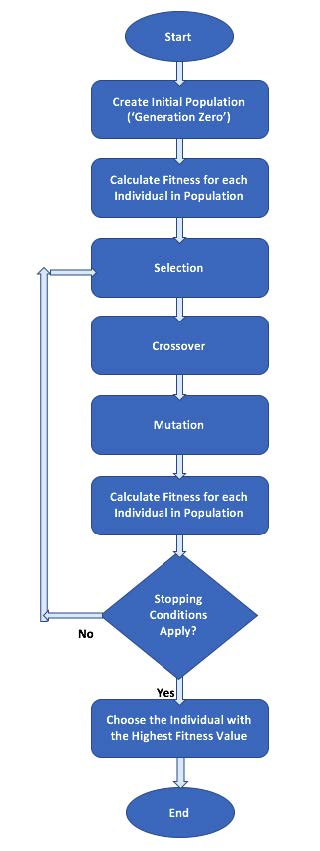

## Algorithm implementation

From the practical point of view, it is not guaranteed that taking two random initial and final grids, there exists a game connecting them in a pre-fixed number $\delta$ of iterations. In order to translate our goal into a different problem, we decided to generate the final configuration from the starting one using the standard GoF rules $\delta$ times. In this way, we can recognize a successful Genetic Algorithm if it finds as best game just the standard GoF. A schematic related to the new goal is drawn below:

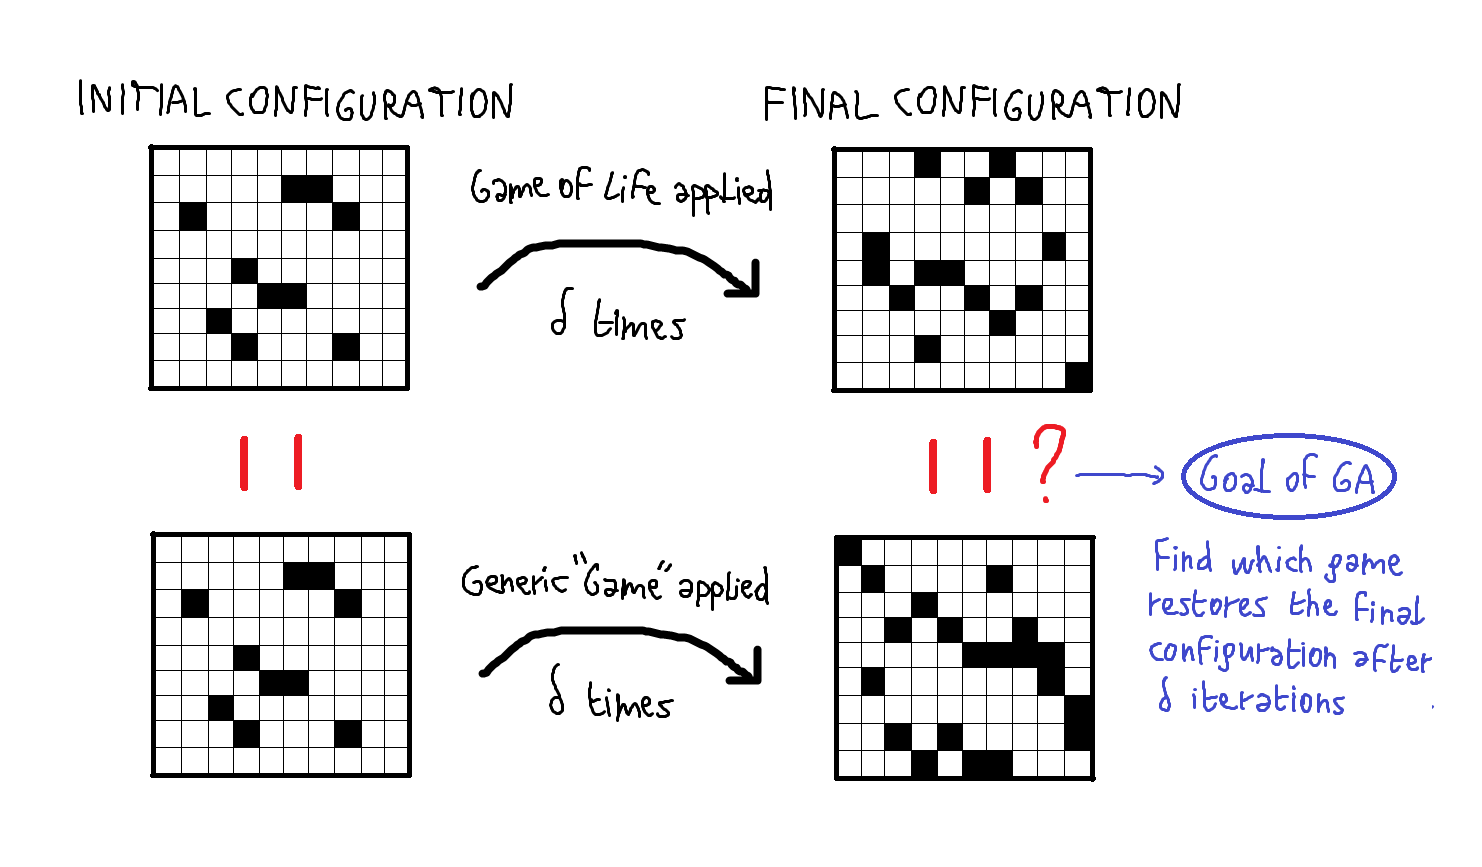

Starting from a population of $N$ games (every game is characterized by a vector of 18 parameters) and letting it evolve through the flow-chart steps, at each epoch, the score of the new population, generated by the better individuals of the previous one, increase. In the end, we will take the best game among all generations as the output of the Genetic Algorithm.

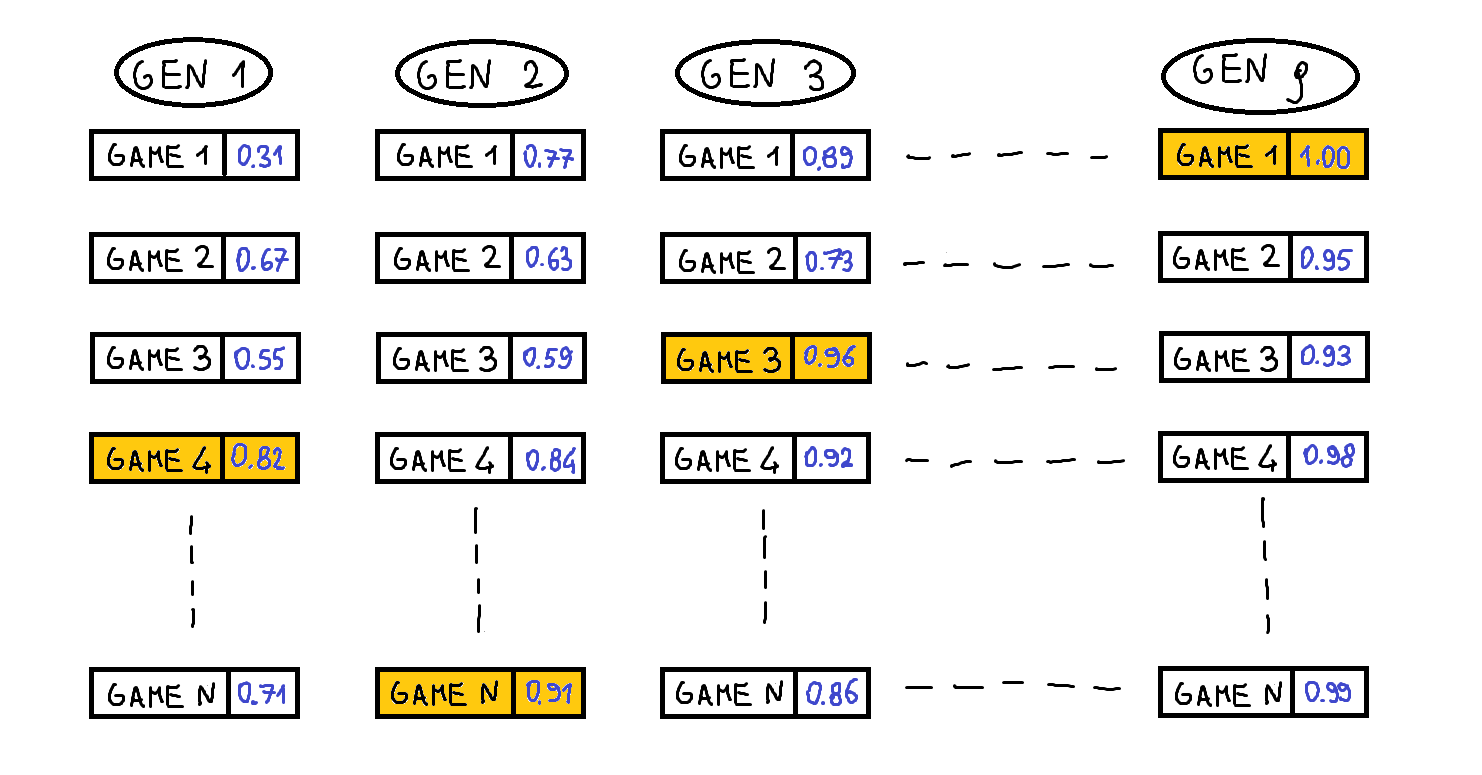

### The needed GoF 

In [ ]:
np.random.seed(2058080)

def visualization(ax, grid, title): # function for plotting the squared grids
    ax.imshow(list(grid),cmap='gray_r')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_title(title,fontweight="bold")

class game_of_life_cl(): # class of the typical Game of Life
    
    def init(self, b, h):
        self.N = h
        self.M = b
        self.data = np.zeros((self.N,self.M))
        self.count_alive = []
        
    def clean_grid(self): 
        self.data = np.zeros((self.N,self.M))
    
    def initial_condition(self, pattern, x_pos, y_pos):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.pattern = pattern
        self.data[self.y_pos:self.y_pos+pattern.shape[0], self.x_pos:self.x_pos+pattern.shape[1]] += pattern
            
    
    def game_rules(self,x,y):
        
        mask_1 = np.logical_and(x == 1, y < 2)
        mask_2 = np.logical_and(x == 1, np.logical_or( y == 2, y == 3))
        mask_3 = np.logical_and(x == 1, y > 3)
        mask_4 = np.logical_and(x == 0, y == 3)

        return mask_1,mask_2,mask_3,mask_4
    
    
    def next_generation(self):
        
        self.count_alive.append(len(self.data[self.data == 1]))
        
        n_alive = np.zeros((self.N,self.M))
        
        grid_d_d = np.roll(np.roll(self.data, -1, axis=1), -1, axis=0)
        grid_d_d[:,self.M-1] = 0
        grid_d_d[self.N-1,:] = 0
        
        grid_u_u = np.roll(np.roll(self.data, 1, axis=1), 1, axis=0)
        grid_u_u[:,0] = 0 
        grid_u_u[0,:] = 0
        
        grid_s_d = np.roll(self.data, -1, axis=1)
        grid_s_d[:,self.M-1] = 0 
        
        grid_u_d = np.roll(np.roll(self.data, -1, axis=1), 1, axis=0)
        grid_u_d[:,self.M-1] = 0
        grid_u_d[0,:] = 0
        
        grid_d_s = np.roll(self.data, -1, axis=0)
        grid_d_s[self.N-1,:] = 0
        
        grid_u_s = np.roll(self.data, 1, axis=0)
        grid_u_s[0,:] = 0
        
        grid_d_u = np.roll(np.roll(self.data, 1, axis=1), -1, axis=0)
        grid_d_u[:,0] = 0
        grid_d_u[self.N-1,:] = 0
        
        grid_s_u = np.roll(self.data, 1, axis=1)
        grid_s_u[:,0] = 0
        
        
        n_alive = grid_d_d + grid_u_u + grid_s_d + grid_u_d + grid_d_s + grid_u_s + grid_d_u + grid_s_u
        
        m_1,m_2,m_3,m_4 = self.game_rules(self.data , n_alive)
        
        self.data[m_1] = 0
        self.data[m_2] = 1
        self.data[m_3] = 0
        self.data[m_4] = 1
        
        return self.data
    
    def start_game(self, delta):
        count = 0
        self.run = True
        while self.run == True:
            self.next_generation()
            count = count +1
            if count == delta:
                self.run = False
        return self.data



class game_of_life_ga(): # class of the Game of Life with generic parameters
    
    def init(self, b, h, p):
        self.parameters = p # parameters that characterize the game
        self.N = h
        self.M = b
        self.data = np.zeros((self.N,self.M))
        self.count_alive = []
        self.score = 0 # attribute used to store the score of the game
        
    def clean_grid(self):
        self.data = np.zeros((self.N,self.M))
    
    def initial_condition(self, pattern, x_pos, y_pos):
        self.x_pos = x_pos
        self.y_pos = y_pos
        self.pattern = pattern
        self.data[self.y_pos:self.y_pos+pattern.shape[0], self.x_pos:self.x_pos+pattern.shape[1]] += pattern
            
    
    def game_rules(self,x,y): # 18 masks, one for each possible case
        
        mask_1 = np.logical_and(x == 1, y == 0)
        mask_2 = np.logical_and(x == 1, y == 1)
        mask_3 = np.logical_and(x == 1, y == 2)
        mask_4 = np.logical_and(x == 1, y == 3)
        mask_5 = np.logical_and(x == 1, y == 4)
        mask_6 = np.logical_and(x == 1, y == 5)
        mask_7 = np.logical_and(x == 1, y == 6)
        mask_8 = np.logical_and(x == 1, y == 7)
        mask_9 = np.logical_and(x == 1, y == 8)
        mask_10 = np.logical_and(x == 0, y == 0)
        mask_11 = np.logical_and(x == 0, y == 1)
        mask_12 = np.logical_and(x == 0, y == 2)
        mask_13 = np.logical_and(x == 0, y == 3)
        mask_14 = np.logical_and(x == 0, y == 4)
        mask_15 = np.logical_and(x == 0, y == 5)
        mask_16 = np.logical_and(x == 0, y == 6)
        mask_17 = np.logical_and(x == 0, y == 7)
        mask_18 = np.logical_and(x == 0, y == 8)

        return mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8,mask_9,mask_10,mask_11,mask_12,mask_13,mask_14,mask_15,mask_16,mask_17,mask_18
    
    
    def next_generation(self):
        
        n_alive = np.zeros((self.N,self.N))
        
        grid_d_d = np.roll(np.roll(self.data, -1, axis=1), -1, axis=0)
        grid_d_d[:,self.M-1] = 0
        grid_d_d[self.N-1,:] = 0
        
        grid_u_u = np.roll(np.roll(self.data, 1, axis=1), 1, axis=0)
        grid_u_u[:,0] = 0 
        grid_u_u[0,:] = 0
        
        grid_s_d = np.roll(self.data, -1, axis=1)
        grid_s_d[:,self.M-1] = 0 
        
        grid_u_d = np.roll(np.roll(self.data, -1, axis=1), 1, axis=0)
        grid_u_d[:,self.M-1] = 0
        grid_u_d[0,:] = 0
        
        grid_d_s = np.roll(self.data, -1, axis=0)
        grid_d_s[self.N-1,:] = 0
        
        grid_u_s = np.roll(self.data, 1, axis=0)
        grid_u_s[0,:] = 0
        
        grid_d_u = np.roll(np.roll(self.data, 1, axis=1), -1, axis=0)
        grid_d_u[:,0] = 0
        grid_d_u[self.N-1,:] = 0
        
        grid_s_u = np.roll(self.data, 1, axis=1)
        grid_s_u[:,0] = 0
        
        n_alive = grid_d_d + grid_u_u + grid_s_d + grid_u_d + grid_d_s + grid_u_s + grid_d_u + grid_s_u
        
        m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,m_13,m_14,m_15,m_16,m_17,m_18 = self.game_rules(self.data , n_alive)
        
        self.data[m_1] = self.parameters[0]
        self.data[m_2] = self.parameters[1]
        self.data[m_3] = self.parameters[2]
        self.data[m_4] = self.parameters[3]
        self.data[m_5] = self.parameters[4]
        self.data[m_6] = self.parameters[5]
        self.data[m_7] = self.parameters[6]
        self.data[m_8] = self.parameters[7]
        self.data[m_9] = self.parameters[8]
        self.data[m_10] = self.parameters[9]
        self.data[m_11] = self.parameters[10]
        self.data[m_12] = self.parameters[11]
        self.data[m_13] = self.parameters[12]
        self.data[m_14] = self.parameters[13]
        self.data[m_15] = self.parameters[14]
        self.data[m_16] = self.parameters[15]
        self.data[m_17] = self.parameters[16]
        self.data[m_18] = self.parameters[17]
        
        self.count_alive.append(np.sum(self.data))
        
        return self.data
    
    def start_game(self, delta):
        count = 0
        self.run = True
        while self.run == True:
            self.next_generation()
            count = count +1
            if count == delta:
                self.run = False
        
        return self.data


### The genetic algorithm

In [ ]:
def true_initial(b, h, dim, alive): # every game would start from this pattern
    start = np.random.binomial(1, alive, (dim, dim)).astype('uint8') # initialize a random QR code
    x_margin = int((b-dim)/2)
    y_margin = int((h-dim)/2)
    blank = np.zeros((b,h))
    blank[x_margin:(b-x_margin), y_margin:(h-y_margin)] += start # insert at centre of the blank grid
    return blank

def true_end(b, h, n, ic): # the target, every game should recover it after delta iterations
    game = game_of_life_cl() # make use of the typical GoF
    game.init(int(b), int(h))
    game.initial_condition(ic, 0, 0) # ic would be indeed the true initial
    fc = game.start_game(n) # run the GoF for n = delta iterations, the output is the final configuration
    return fc

def run_game(game, delta, generic_ic): # run a certain game for delta iterations starting from the true initial
    game.clean_grid()
    game.initial_condition(generic_ic, 0, 0)
    generic_fc = game.start_game(delta)
    return generic_fc
        
def fitness(candidate, target, b, h): # similarity score between two patterns
    
    return ((candidate == target).sum())/(b*h)

def score_population(population, generic_ic, target, delta): # compute score for an entire population
    
    for i in range(len(population)):
        population[i].score = fitness(run_game(population[i], delta, generic_ic), target, b, h) # storing the score inside the game
    
def selection(population, retain_frac, retain_random): # selection among the population
    
    retain_len = int(len(population) * retain_frac) # how many on the population are preserved for the next generation
    population.sort(key=lambda x: x.score, reverse=True)
    selected = population[:retain_len] # preserved population
    leftovers = population[retain_len:] # discarded population

    for par in leftovers: # from the discarded ones let's pick some at random
        if np.random.rand() < retain_random:
            selected.append(par)
    return selected

def mutate(param, switch_frac=0.1): # given the parameters of a game, some numbers of the vector flip
    
    a = np.random.binomial(1, switch_frac, size=18).astype('bool') # mask of True and False
    
    param[a] += 1
    param[a] %= 2 
    
    return param

def crossover(mom, dad): # mom and dad are indeed mom and dad parameters
    
    select_mask = np.random.binomial(1, 0.5, size=18).astype('bool') # mask of True and False (fifty-fifty)
    child1, child2 = np.copy(mom), np.copy(dad) # child1 is initially like the mom, child2 is like dad
    
    child1[select_mask] = dad[select_mask] # crossover between mom and dad 
    child2[select_mask] = mom[select_mask] # crossover between dad and mom
    
    return child1, child2

def evolve(b, h, population, ic, target, delta, retain_frac=0.5, retain_random=0.05, mutate_chance=0.15):
    
    score_population(population, ic, target, delta) # compute the score for every game in the population
    scores = [population[i].score for i in range(N)]
    next_population = selection(population, retain_frac=retain_frac, retain_random=retain_random) # select the fraction of population with best score
    
    for gene in next_population[1:]: 
        if np.random.rand() < mutate_chance:
            mutate(gene.parameters) # mutate some individuals of this fraction of population

    places_left = len(population) - len(next_population)
    children = []
    parent_max_idx = len(next_population) - 1
    while len(children) < places_left:
        mom_idx, dad_idx = np.random.randint(0, parent_max_idx, 2) # select randomly two games to let them couple
        if mom_idx != dad_idx:
            child1, child2 = crossover(next_population[mom_idx].parameters, next_population[dad_idx].parameters) # generate childs' parameters
            new_game = game_of_life_ga() 
            new_game.init(int(b), int(h), child1) # insert child1 parameters in a new game (individual)
            children.append(new_game)
            if len(children) < places_left:
                new_game2 = game_of_life_ga()
                new_game2.init(int(b), int(h), child2) # insert child2 parameters in a new game (individual)
                children.append(new_game2)
    next_population.extend(children) # bring children inside the new population
    
    return next_population


b = 30 # grid width
h = 30 # grid height
N = 200 # number of individuals in the population
g = 50 # number of generations for evolving

delta = 10 # number of iterations that games run
initial_config = true_initial(b, h, dim = 20, alive = 0.3) # initial configuration for all games
final_target = true_end(b, h, delta, initial_config) #final configuration for all games


population = [] # list with all the games of the population

for i in range(0,N): # initialize population
    population.append(game_of_life_ga()) 
    population[i].init(int(b), int(h), np.random.randint(2, size = 18)) # random rules

average_scores = [] # average scores over the generations
best_scores = [] # best scores over the generations
best_games = [] # best games over the generations

for i in range(g): 
    population = evolve(b, h, population, initial_config, final_target, delta) # population will be itself, but evolved
    score_population(population, initial_config, final_target, delta) # compute score of the current generation
    scores_all_population = [population[i].score for i in range(N)]
    average_scores.append(np.mean(scores_all_population))
    best_scores.append(np.max(scores_all_population)) 
    idx = np.argmax(scores_all_population) 
    best_games.append(population[idx]) 

banal_score = 1 - (np.sum(final_target))/(b*h) # score of the blank grid (the one made of all zeros)

best_rules = [best_games[i].parameters for i in range(g)] # rules concerning the best games at every generation
predictions = [run_game(best_games[i], delta, initial_config) for i in range(g)] # best_games final grids (to be compared with the target)

### Visualisation of the results

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
visualization(axs[0], initial_config, "True initial")
visualization(axs[1], final_target, "Target")

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax.plot(np.arange(g), best_scores, color = 'blue', label = "Best individual of population", linewidth = 2)
ax.plot(np.arange(g), average_scores, color = 'orange', label = "Average of population", linewidth = 2)
ax.axhline(banal_score, linestyle = '--', color = 'r', label = "Blank grid score")
ax.set_xlabel("Generation number", fontweight = "bold")
ax.set_ylabel("Fitness value", fontweight = "bold")
ax.set_title("Fitness over generations", fontweight = "bold")
ax.legend(loc = "best")

In [ ]:
final_scores = [population[i].score for i in range(N)] # scores of the games of the final generation

fig, ax = plt.subplots(figsize = (15,8))
ax.hist(final_scores, bins = 20, color = "red", edgecolor = "black", alpha = 0.7)
ax.set_xlabel("Fitness value", fontweight = "bold")
ax.set_ylabel("Counts per bin", fontweight = "bold")
ax.set_title("Fitness distribution of final generation", fontweight = "bold")

In [ ]:
fig, axs = plt.subplots(10, 5, figsize = (18,45)) # plot of best predictions over generations
m = 0
for i in range(10):
    for j in range(5):
        axs[i, j].imshow(list(predictions[m]),cmap='gray_r')
        axs[i, j].get_xaxis().set_ticks([])
        axs[i, j].get_yaxis().set_ticks([])
        axs[i, j].set_title("Best prediction of gen {}".format(m+1),fontweight="bold")
        axs[i, j].set_xlabel(str(best_rules[m]))
        m += 1

In [ ]:
best_score_ever = np.max(best_scores)
idx = np.argmax(best_scores) 
best_game_ever = best_games[idx] 
best_rule_ever = best_game_ever.parameters 
best_prediction_ever = run_game(best_game_ever, delta, initial_config) 

print("Best rule ever:", best_rule_ever)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
visualization(axs[0], initial_config, "True initial")
visualization(axs[1], final_target, "Target")
visualization(axs[2], best_prediction_ever, "Best prediction ever")
axs[2].set_xlabel(best_rule_ever)
plt.show()

## Conclusions for the GA

Our Genetic Algorithm finds as best game an individual that is very similar to the standard Game of Life (but non-equal), and despite that displays the maximum score possible that is $1.0$. The reason for this strange behavior in terms of the score is due to the initial configuration: in the evolution from the start to the end, probably, all games never experience an alive cell surrounded by 8 other alive cells, so the Genetic Algorithm cannot _train_ properly the population on it.

A way to improve this Genetic Algorithm precision could be training games on multiple and random initial conditions.

One other thing to take in mind is that the performance of the GA (how many generations are needed to find a perfect solution) depends strictly on the fixed random seed. There are cases in which only with 50 generations the algorithm can't improve enough, needing more training.

# References

Bays, Carter, “Candidates for the Game of Life in Three Dimensions”, Complex Systems, 1 (1987) 373–400.

Wirsansky, Eyal, " Hands-on genetic algorithms with Python: applying genetic algorithms to solve real-world deep learning and artificial intelligence problems", Packt Publishing Ltd, 2020.

https://www.conwaylife.com/wiki/Main_Page

https://www.pygame.org/docs/genindex.html

# Backup files

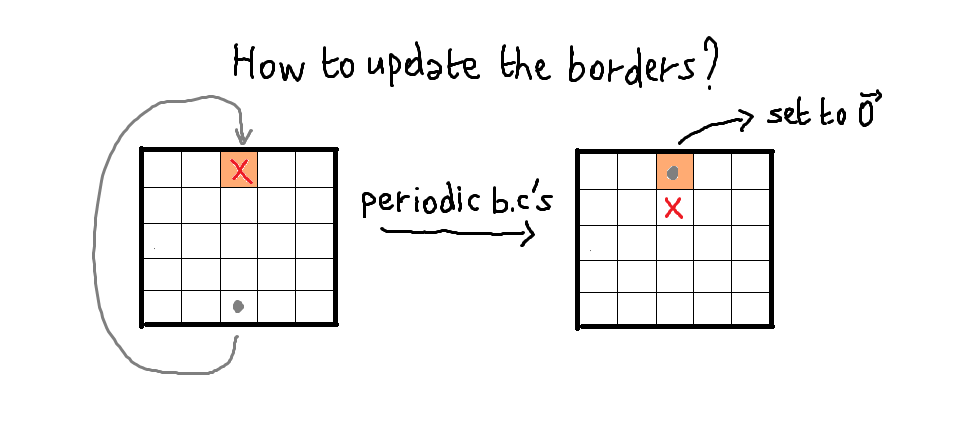